In [1]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [2]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import re
from sklearn.mixture import GaussianMixture

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [3]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [4]:
name_of_project = 'canola'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/canola/o3on' and 'Projects/canola/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [5]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'canola'
Project_Folder_data = Project + Project_Name + '/mzml_off/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'canola_OzOFF'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: canola
Project_Folder_data: ./Projects/canola/mzml_off/
Project_results: ./Projects/canola/results/
file_name_to_save: canola_OzOFF
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [6]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [7]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/canola/mzml_off/CrudeCanola_O3off_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml_off/DegummedCanola_O3off_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml_off/RBDCanola_O3off_150gN3_02082023.mzML

Finished parsing all mzML files



In [8]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,7.185317e+05,NaN,760.6,571.6,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
1,NaN,8.431076e+05,NaN,762.6,573.6,CrudeCanola_O3off_150gN3_02082023,762.6 -> 573.6
2,NaN,6.004693e+05,NaN,764.6,575.6,CrudeCanola_O3off_150gN3_02082023,764.6 -> 575.6
3,NaN,6.971521e+05,NaN,766.7,577.6,CrudeCanola_O3off_150gN3_02082023,766.7 -> 577.6
4,NaN,6.040157e+05,NaN,782.6,593.6,CrudeCanola_O3off_150gN3_02082023,782.6 -> 593.6
...,...,...,...,...,...,...,...
100,TAG,5.595606e+05,[TG(54:6)]_FA18:1,896.8,597.6,RBDCanola_O3off_150gN3_02082023,896.8 -> 597.6
101,TAG,2.785076e+06,[TG(54:5)]_FA18:1,898.8,599.6,RBDCanola_O3off_150gN3_02082023,898.8 -> 599.6
102,TAG,6.190749e+06,"[TG(55:11),TG(54:4)]_FA18:1",900.8,601.6,RBDCanola_O3off_150gN3_02082023,900.8 -> 601.6
103,TAG,1.703119e+07,"[TG(55:10),TG(54:3)]_FA18:1",902.8,603.6,RBDCanola_O3off_150gN3_02082023,902.8 -> 603.6


Group for df_MRM as well

In [9]:
# Creating the Match_Group column
df_MRM['Match_Group'] = df_MRM.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Display the DataFrame with the new column
df_MRM

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition,Match_Group
0,NaN,7.185317e+05,NaN,760.6,571.6,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0
1,NaN,8.431076e+05,NaN,762.6,573.6,CrudeCanola_O3off_150gN3_02082023,762.6 -> 573.6,3
2,NaN,6.004693e+05,NaN,764.6,575.6,CrudeCanola_O3off_150gN3_02082023,764.6 -> 575.6,6
3,NaN,6.971521e+05,NaN,766.7,577.6,CrudeCanola_O3off_150gN3_02082023,766.7 -> 577.6,9
4,NaN,6.040157e+05,NaN,782.6,593.6,CrudeCanola_O3off_150gN3_02082023,782.6 -> 593.6,12
...,...,...,...,...,...,...,...,...
100,TAG,5.595606e+05,[TG(54:6)]_FA18:1,896.8,597.6,RBDCanola_O3off_150gN3_02082023,896.8 -> 597.6,89
101,TAG,2.785076e+06,[TG(54:5)]_FA18:1,898.8,599.6,RBDCanola_O3off_150gN3_02082023,898.8 -> 599.6,92
102,TAG,6.190749e+06,"[TG(55:11),TG(54:4)]_FA18:1",900.8,601.6,RBDCanola_O3off_150gN3_02082023,900.8 -> 601.6,95
103,TAG,1.703119e+07,"[TG(55:10),TG(54:3)]_FA18:1",902.8,603.6,RBDCanola_O3off_150gN3_02082023,902.8 -> 603.6,98


In [10]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,760.6,571.6,0.015933,78.560005,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
1,NaN,760.6,571.6,0.032233,128.980011,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
2,NaN,760.6,571.6,0.048550,212.620010,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
3,NaN,760.6,571.6,0.064850,217.120010,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
4,NaN,760.6,571.6,0.081167,285.280029,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
...,...,...,...,...,...,...,...
197911,NaN,904.8,605.6,22.146267,6299.000488,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6
197912,NaN,904.8,605.6,22.162567,6306.900391,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6
197913,NaN,904.8,605.6,22.178883,6083.100586,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6
197914,NaN,904.8,605.6,22.195183,5533.560547,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [11]:
d1 = df_OzESI.iloc[:,1:9]

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (9.5, 21.5)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
d1a = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range
# filtered_d1.to_csv('filtered_d1_FF_OzON_Liver.csv')
d1a

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
582,760.6,571.6,9.507167,278.900024,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
583,760.6,571.6,9.523467,198.680008,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
584,760.6,571.6,9.539783,203.580017,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
585,760.6,571.6,9.556083,236.520020,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
586,760.6,571.6,9.572400,310.940033,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6
...,...,...,...,...,...,...
197867,904.8,605.6,21.428717,5118.060547,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6
197868,904.8,605.6,21.445017,4722.840332,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6
197869,904.8,605.6,21.461333,4526.420410,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6
197870,904.8,605.6,21.477633,4397.760254,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6


# create Group for OzESI df to iterate through it faster instead of checking every single row

In [12]:
# Creating the Match_Group column
d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Display the DataFrame with the new column
d1a

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group
582,760.6,571.6,9.507167,278.900024,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0
583,760.6,571.6,9.523467,198.680008,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0
584,760.6,571.6,9.539783,203.580017,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0
585,760.6,571.6,9.556083,236.520020,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0
586,760.6,571.6,9.572400,310.940033,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0
...,...,...,...,...,...,...,...
197867,904.8,605.6,21.428717,5118.060547,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101
197868,904.8,605.6,21.445017,4722.840332,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101
197869,904.8,605.6,21.461333,4526.420410,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101
197870,904.8,605.6,21.477633,4397.760254,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101


# plot show spectrum

In [57]:


# # Assuming clustered_data is your DataFrame with the necessary data

# # Plotting the Intensity vs Retention Time
# plt.figure(figsize=(10, 6))
# plt.scatter(d1a['Retention_Time'], d1a['OzESI_Intensity'])

# # Adding labels and title to the plot
# plt.xlabel('Retention Time')
# plt.ylabel('OzESI Intensity')
# plt.title('Retention Time vs OzESI Intensity')

# # Displaying the plot
# plt.show()


# plot specific lipid

# Pipeline for OzON Truth

Correct RTs add DB position based on correct RT

Nested for loops too slow but last resort if cannot get others to work

In [14]:
# d1b = d1a.copy()
# # Define a function to check if two ions are within the tolerance
# def is_within_tolerance(ion1, ion2, tolerance=0.3):
#     return abs(ion1 - ion2) <= tolerance

# # Initialize the Lipid column in d1a
# d1b['Lipid'] = None

# # Iterate through d1b and match lipids from df_MRM
# for index, row in d1b.iterrows():
#     for _, mrm_row in df_MRM.iterrows():
#         if is_within_tolerance(row['Parent_Ion'], mrm_row['Parent_Ion']) and is_within_tolerance(row['Product_Ion'], mrm_row['Product_Ion']):
#             d1b.at[index, 'Lipid'] = mrm_row['Lipid']
#             break  # Stop searching once a match is found

# # Display the updated d1b
# print(d1b)

# Use merge instead of nested for loops

In [15]:
d1b = d1a.copy()

# Assuming df_MRM and d1b are already defined

# Create Match_Group in d1a if it doesn't exist
if 'Match_Group' not in d1a.columns:
    d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Copy Match_Group to d1b
d1b['Match_Group'] = d1a['Match_Group']

# Function to check if two ions are within the tolerance
def is_within_tolerance(ion1, ion2, tolerance=0.3):
    return abs(ion1 - ion2) <= tolerance

# Add a new column for Lipid in d1b
d1b['Lipid'] = None

# Iterate through each unique Match_Group in d1a
for group in d1a['Match_Group'].unique():
    # Extract a representative row for the current group from d1a
    group_row = d1a[d1a['Match_Group'] == group].iloc[0]

    # Find a matching lipid in df_MRM for the representative row
    for _, mrm_row in df_MRM.iterrows():
        if is_within_tolerance(group_row['Parent_Ion'], mrm_row['Parent_Ion']) and is_within_tolerance(group_row['Product_Ion'], mrm_row['Product_Ion']):
            # Assign the lipid to all rows in the corresponding group in d1b
            d1b.loc[d1b['Match_Group'] == group, 'Lipid'] = mrm_row['Lipid']
            break  # Stop searching once a match is found

# Display the updated d1b DataFrame
d1b

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid
582,760.6,571.6,9.507167,278.900024,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
583,760.6,571.6,9.523467,198.680008,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
584,760.6,571.6,9.539783,203.580017,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
585,760.6,571.6,9.556083,236.520020,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
586,760.6,571.6,9.572400,310.940033,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
...,...,...,...,...,...,...,...,...
197867,904.8,605.6,21.428717,5118.060547,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1"
197868,904.8,605.6,21.445017,4722.840332,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1"
197869,904.8,605.6,21.461333,4526.420410,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1"
197870,904.8,605.6,21.477633,4397.760254,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1"


Plot specific lipid

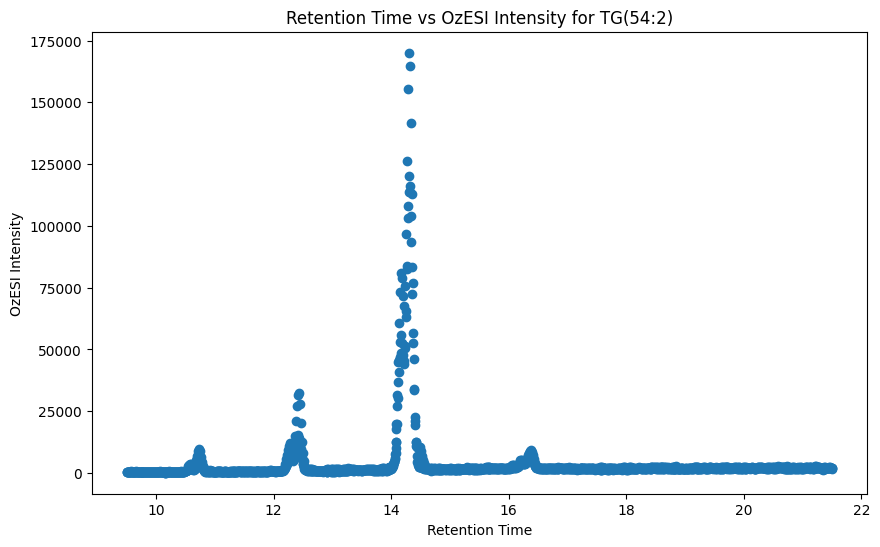

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Function to filter DataFrame based on a regex pattern in the 'Lipid' column
def filter_lipid(df, lipid_pattern):
    """
    Filter a DataFrame based on a regex pattern in the 'Lipid' column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be filtered.
    lipid_pattern (str): The regex pattern to search for in the 'Lipid' column.

    Returns:
    pandas.DataFrame: A filtered DataFrame containing rows where the 'Lipid' column matches the pattern.
    """
    # Drop rows where 'Lipid' is NaN to avoid issues with str.contains
    df = df.dropna(subset=['Lipid'])

    # Use regex for flexible matching in 'Lipid' column
    regex_pattern = re.compile(lipid_pattern)
    filtered_df = df[df['Lipid'].str.contains(regex_pattern, na=False)]
    return filtered_df

# Filter the DataFrame for the specific lipid TG(54:2)
filtered_d1a = filter_lipid(d1b, 'TG\(54:5\)')

# Plotting Intensity vs Retention Time for the specific lipid
plt.figure(figsize=(10, 6))
plt.scatter(filtered_d1a['Retention_Time'], filtered_d1a['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity for TG(54:2)')

# Displaying the plot
plt.show()


In [32]:
d1b

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid
582,760.6,571.6,9.507167,278.900024,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
583,760.6,571.6,9.523467,198.680008,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
584,760.6,571.6,9.539783,203.580017,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
585,760.6,571.6,9.556083,236.520020,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
586,760.6,571.6,9.572400,310.940033,CrudeCanola_O3off_150gN3_02082023,760.6 -> 571.6,0,NaN
...,...,...,...,...,...,...,...,...
197867,904.8,605.6,21.428717,5118.060547,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1"
197868,904.8,605.6,21.445017,4722.840332,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1"
197869,904.8,605.6,21.461333,4526.420410,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1"
197870,904.8,605.6,21.477633,4397.760254,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1"


In [44]:
import pandas as pd
import re

def filter_lipid(df, lipid_pattern, purity_type=None):
    """
    Filter a DataFrame based on a regex pattern in the 'Lipid' column and optionally by a value in the 'Purity' column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be filtered.
    lipid_pattern (str): The regex pattern to search for in the 'Lipid' column.
    purity_type (str, optional): The value to filter for in the 'Purity' column.

    Returns:
    pandas.DataFrame: A filtered DataFrame containing rows where the 'Lipid' column matches the pattern
                      and, if specified, the 'Purity' column matches the purity type.
    """
    # Drop rows where 'Lipid' is NaN to avoid issues with str.contains
    df = df.dropna(subset=['Lipid'])

    # Use regex for flexible matching in 'Lipid' column
    regex_pattern = re.compile(lipid_pattern)
    filtered_df = df[df['Lipid'].str.contains(regex_pattern, na=False)]

    # Additional filtering based on 'Purity' column
    if purity_type:
        filtered_df = filtered_df[df['Purity'] == purity_type]

    return filtered_df

# Example usage with a regex pattern and additional filtering for Purity
filtered = filter_lipid(d1b, 'TG\(52:2\)')
filtered[1000:1010]
filtered

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid
60673,876.8,577.6,9.510450,230.580017,CrudeCanola_O3off_150gN3_02082023,876.8 -> 577.6,81,"[TG(53:9),TG(52:2)]_FA18:1"
60674,876.8,577.6,9.526767,312.060028,CrudeCanola_O3off_150gN3_02082023,876.8 -> 577.6,81,"[TG(53:9),TG(52:2)]_FA18:1"
60675,876.8,577.6,9.543067,372.960022,CrudeCanola_O3off_150gN3_02082023,876.8 -> 577.6,81,"[TG(53:9),TG(52:2)]_FA18:1"
60676,876.8,577.6,9.559383,410.340027,CrudeCanola_O3off_150gN3_02082023,876.8 -> 577.6,81,"[TG(53:9),TG(52:2)]_FA18:1"
60677,876.8,577.6,9.575683,406.960022,CrudeCanola_O3off_150gN3_02082023,876.8 -> 577.6,81,"[TG(53:9),TG(52:2)]_FA18:1"
...,...,...,...,...,...,...,...,...
189689,876.8,577.6,21.431533,10027.600586,RBDCanola_O3off_150gN3_02082023,876.8 -> 577.6,83,"[TG(53:9),TG(52:2)]_FA18:1"
189690,876.8,577.6,21.447833,9487.560547,RBDCanola_O3off_150gN3_02082023,876.8 -> 577.6,83,"[TG(53:9),TG(52:2)]_FA18:1"
189691,876.8,577.6,21.464150,9964.041016,RBDCanola_O3off_150gN3_02082023,876.8 -> 577.6,83,"[TG(53:9),TG(52:2)]_FA18:1"
189692,876.8,577.6,21.480450,9977.480469,RBDCanola_O3off_150gN3_02082023,876.8 -> 577.6,83,"[TG(53:9),TG(52:2)]_FA18:1"


# Assign Correct_RT for each Lipid group is OzON to define ground truth RT for each lipid in each sample

In [67]:


d1c = d1b.copy()    
# Assuming your DataFrame is named d1c

import pandas as pd

# Assuming your DataFrame is named df

# Group by Match_Group and find the Retention_Time corresponding to the max OzESI_Intensity for each group
max_rt_per_group = d1c.groupby('Match_Group').apply(lambda x: x.loc[x['OzESI_Intensity'].idxmax(), 'Retention_Time'])

# Map the max retention time to the Correct_RT column for each group
d1c['Correct_RT'] = d1c['Match_Group'].map(max_rt_per_group)

d1c


# # print len of unique values in Correct_RT column
# print(len(d1c['Correct_RT'].unique()))
filtered = filter_lipid(d1c, 'TG\(52:2\)')
filtered[1000:1010]


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Correct_RT
136056,876.8,577.6,13.815733,972.460083,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483
136057,876.8,577.6,13.832050,1070.300049,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483
136058,876.8,577.6,13.848350,1245.940063,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483
136059,876.8,577.6,13.864667,1300.480103,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483
136060,876.8,577.6,13.880967,1309.360107,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483
136061,876.8,577.6,13.897283,1191.500122,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483
136062,876.8,577.6,13.913583,1166.880127,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483
136063,876.8,577.6,13.929883,1057.840088,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483
136064,876.8,577.6,13.946200,1050.860107,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483
136065,876.8,577.6,13.962500,1080.300049,DegummedCanola_O3off_150gN3_02082023,876.8 -> 577.6,82,"[TG(53:9),TG(52:2)]_FA18:1",18.039483


Filter out NaN values from Lipid column

In [69]:
import pandas as pd

# Assuming d1c is your DataFrame

# Copying d1c to d1d
d1d = d1c.copy()

# Group by Match_Group and filter out groups where all 'Lipid' values are NaN
d1d = d1c.groupby('Match_Group').filter(lambda x: not x['Lipid'].isna().all())

# Find the max OzESI_Intensity for each Match_Group
max_intensity_per_group = d1d.groupby('Match_Group')['OzESI_Intensity'].max()

# Map the max intensity to a new column Max_Intensity for each group
d1d['Max_Intensity'] = d1d['Match_Group'].map(max_intensity_per_group)

# Round the Correct_RT column to 2 decimal places and also Max_Intensity and OzESI_Intensity to 0 decimal places and Retention_Time to 2 decimal places
d1d['Correct_RT'] = d1d['Correct_RT'].round(2)
d1d['Max_Intensity'] = d1d['Max_Intensity'].round(0)
d1d['OzESI_Intensity'] = d1d['OzESI_Intensity'].round(0)
d1d['Retention_Time'] = d1d['Retention_Time'].round(2)

# Keep only the row with the highest OzESI_Intensity in each Match_Group
d1d = d1d.sort_values('OzESI_Intensity', ascending=False).drop_duplicates('Match_Group')


def extract_details_from_sample_id(df, column_name='Sample_ID', new_columns=None):
    """
    Extracts specified details from the Sample_ID column and adds them as new columns.

    Args:
    df (pandas.DataFrame): The DataFrame containing the Sample_ID column.
    column_name (str): The name of the column to extract the details from. Default is 'Sample_ID'.
    new_columns (dict): A dictionary where keys are the names of new columns to be added, 
                        and values are lists of possible string values for those columns.

    Returns:
    pandas.DataFrame: The original DataFrame with added columns.
    """
    # Check if new_columns is provided
    if new_columns is None or not isinstance(new_columns, dict):
        raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")

    # Loop through each new column and its possible values
    for col, values in new_columns.items():
        # Create a regular expression pattern for each column
        pattern = f"(?P<{col}>{'|'.join(values)})"

        # Extract the matched pattern and create the new column
        df_extracted = df[column_name].str.extract(pattern)

        # Add the new column to the original DataFrame
        df = pd.concat([df, df_extracted[[col]]], axis=1)

    return df


new_columns = {'Purity': ['Crude', 'RBD', 'Degummed']}
d1d = extract_details_from_sample_id(d1d, new_columns=new_columns)




# Group by Match_Group and filter out groups where the max Max_Intensity is under 300
d1d = d1d.groupby('Match_Group').filter(lambda x: x['Max_Intensity'].max() >= 300)

# d1d now contains one row per Match_Group with the highest OzESI_Intensity
# #save the data to csv
# d1d.to_csv('Projects/FaceFats/data/OzOFF_CorrectRT/FF_Brain5xFAD_OzOFF_CorrectRT.csv')
d1d

filtered = filter_lipid(d1d, 'TG\(54:2\)')
filtered

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Correct_RT,Max_Intensity,Purity
74075,904.8,605.6,17.99,155287.0,CrudeCanola_O3off_150gN3_02082023,904.8 -> 605.6,99,"[TG(55:9),TG(54:2)]_FA18:1",17.99,155287.0,Crude
197655,904.8,605.6,17.97,123075.0,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1",17.97,123075.0,RBD
149194,904.8,605.6,17.99,114217.0,DegummedCanola_O3off_150gN3_02082023,904.8 -> 605.6,100,"[TG(55:9),TG(54:2)]_FA18:1",17.99,114217.0,Degummed


# create Group_Sample column

In [73]:
import pandas as pd

def add_group_sample_column(df, group_columns):
    """
    Adds a new column 'Group_Sample' to the DataFrame, assigning a unique group number 
    for each unique combination of specified columns.

    Args:
    df (pandas.DataFrame): The DataFrame to process.
    group_columns (list of str): List of column names to use for creating group identifiers.

    Returns:
    pandas.DataFrame: The DataFrame with the added 'Group_Sample' column.
    """
    # Validate the group_columns input
    if not all(col in df.columns for col in group_columns):
        raise ValueError("One or more columns in group_columns are not in the DataFrame")

    # Create the 'Group_Sample' column by assigning a group number for each combination
    df['Group_Sample'] = df.groupby(group_columns).ngroup()

    return df


group_columns = ['Purity','Lipid'] # Replace with your columns of interest
d1e = add_group_sample_column(d1d, group_columns)
d1e = d1e.sort_values(by=['Lipid', 'Purity'])

d1e

filtered = filter_lipid(d1e, 'TG\(54:2\)')
filtered


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Correct_RT,Max_Intensity,Purity,Group_Sample
74075,904.8,605.6,17.99,155287.0,CrudeCanola_O3off_150gN3_02082023,904.8 -> 605.6,99,"[TG(55:9),TG(54:2)]_FA18:1",17.99,155287.0,Crude,10
149194,904.8,605.6,17.99,114217.0,DegummedCanola_O3off_150gN3_02082023,904.8 -> 605.6,100,"[TG(55:9),TG(54:2)]_FA18:1",17.99,114217.0,Degummed,21
197655,904.8,605.6,17.97,123075.0,RBDCanola_O3off_150gN3_02082023,904.8 -> 605.6,101,"[TG(55:9),TG(54:2)]_FA18:1",17.97,123075.0,RBD,32


# Save OzOFF df

In [75]:
d1e.to_csv('Projects/canola/RT/Canola_OzOFF_CorrectRT.csv')
d1e

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Correct_RT,Max_Intensity,Purity,Group_Sample
56674,872.8,573.6,14.32,12676.0,CrudeCanola_O3off_150gN3_02082023,872.8 -> 573.6,75,[TG(52:4)]_FA18:1,14.32,12676.0,Crude,0
131793,872.8,573.6,14.32,10049.0,DegummedCanola_O3off_150gN3_02082023,872.8 -> 573.6,76,[TG(52:4)]_FA18:1,14.32,10049.0,Degummed,11
186528,872.8,573.6,14.32,10206.0,RBDCanola_O3off_150gN3_02082023,872.8 -> 573.6,77,[TG(52:4)]_FA18:1,14.32,10206.0,RBD,22
54422,870.8,571.6,12.59,1538.0,CrudeCanola_O3off_150gN3_02082023,870.8 -> 571.6,72,[TG(52:5)]_FA18:1,12.59,1538.0,Crude,1
129542,870.8,571.6,12.61,631.0,DegummedCanola_O3off_150gN3_02082023,870.8 -> 571.6,73,[TG(52:5)]_FA18:1,12.61,631.0,Degummed,12
185059,870.8,571.6,12.58,766.0,RBDCanola_O3off_150gN3_02082023,870.8 -> 571.6,74,[TG(52:5)]_FA18:1,12.58,766.0,RBD,23
52159,868.7,569.6,10.69,517.0,CrudeCanola_O3off_150gN3_02082023,868.7 -> 569.6,69,[TG(52:6)]_FA18:1,10.69,517.0,Crude,2
125602,868.7,569.6,18.35,394.0,DegummedCanola_O3off_150gN3_02082023,868.7 -> 569.6,70,[TG(52:6)]_FA18:1,18.35,394.0,Degummed,13
182827,868.7,569.6,20.60,463.0,RBDCanola_O3off_150gN3_02082023,868.7 -> 569.6,71,[TG(52:6)]_FA18:1,20.60,463.0,RBD,24
58931,874.8,575.6,16.12,64546.0,CrudeCanola_O3off_150gN3_02082023,874.8 -> 575.6,78,"[TG(53:10),TG(52:3)]_FA18:1",16.12,64546.0,Crude,3
